In [1]:
import os, random, numpy as np
import pandas as pd
from pathlib import Path
import shutil
from questionnaire_functions import (export_questionnaire,export_questionnaire,analyze_questionnaire)
from pca_functions import (find_optimal_pca_dimensions,plot_pca_weights_two_cols_split,plot_pca_weights_separate_and_table)
from clustring_functions import(pca_kmeans_minimal_outputs,run_kmeans_clustering,invert_binary_columns,gap_statistic)
from vizualizations_functions import (plot_grouped_bars,plot_multi_dataset_scatters_colored,plot_one_period_with_labels,get_labels_from_file,plot_one_period_with_labels_and_ttest,
plot_subject_trajectories,stats_by_group,safe)
from preprocessing_functions import (load_one,transition_for_pair)
from functools import reduce
import textwrap
from scipy import stats
from statsmodels.stats.multitest import fdrcorrection
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import ttest_rel
## using the data before pregnancy
import pandas as pd
import matplotlib.pyplot as plt

### bits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import math
from regression_functions import(clean_variable_name,compare_clusters_no_fdr,run_regression_and_plot,run_lasso_cv_scatter,run_lasso_scatter)

In [2]:
SEED = 17
os.environ["PYTHONHASHSEED"] = str(SEED)

# לכבות רנדומליות בספריות BLAS/OMP
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"

random.seed(SEED)
np.random.seed(SEED)

print("Seed fixed:", SEED)

Seed fixed: 17


# prediction with combined dataset

## before

In [3]:
df = pd.read_csv("only_Q_outputs/combined/regression/subjects_pc_b_with_regression.csv")

pc_cols = [f"PC{i}" for i in range(1, 14)]

targets =    ['after_bits_PTSD_total',
    'after_bits_birth_symptoms', 'after_bits_General_symptoms',
    'after_bits_Dissociatie_symptoms', 'after_bits_PTSD_criterion',
    'after_bits_Re_experiencing ', 'after_bits_Avoidance ',
    'after_bits_Negative_Cognitions ', 'after_bits_Hyperarousal',
    'after_MPAS_total', 'after_MPAS_Attachment',
    'after_MPAS_Hostility', 'after_MPAS_Interaction','t1_MAAS_total','t2_MAAS_total','t3_MAAS_total']
prediction_df, results, results_df = run_regression_and_plot(
    df=df,
    pc_cols=pc_cols,
    targets=targets,
    cluster_col="cluster",
    n_cols=4,
    title_prefix="Predicted: ",
    timepoint="b",                              # <--- NEW
    save_csv_path="only_Q_outputs/combined/regression_results/lasso_with_cv_b.csv"  # <--- NEW
)


📁 Saved regression summary to: only_Q_outputs/combined/regression_results/lasso_with_cv_b.csv


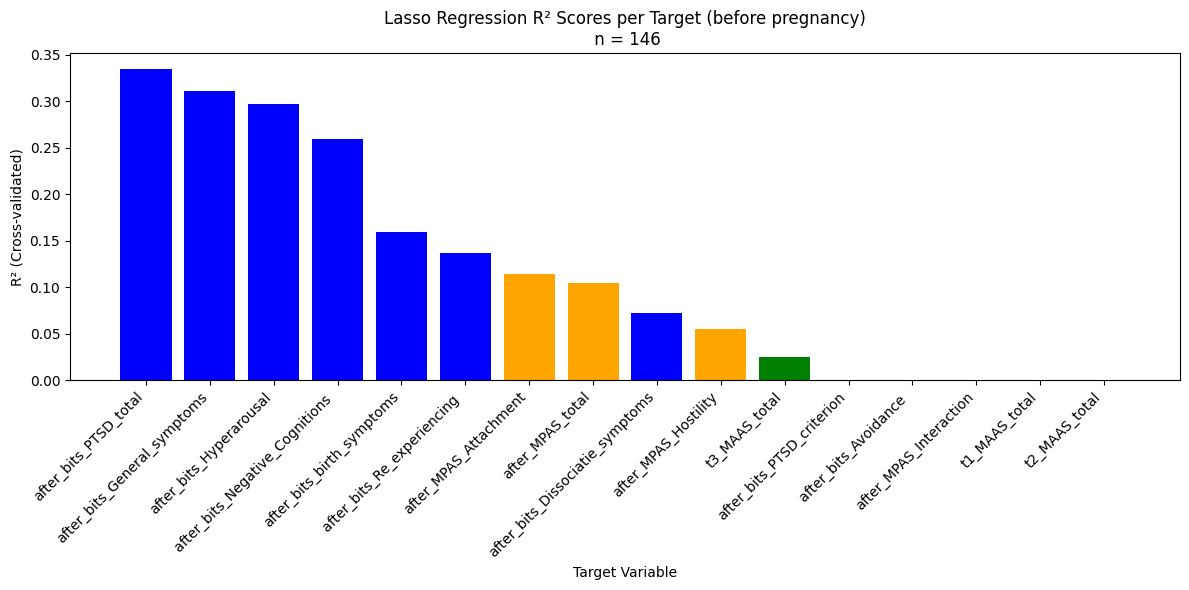

In [4]:

# Load your saved results
df = pd.read_csv("only_Q_outputs/combined/regression_results/lasso_with_cv_b.csv")

df_sorted = df.sort_values("R2_cv", ascending=False)
# Define your groups

group1 = ['after_bits_PTSD_total',
    'after_bits_birth_symptoms', 'after_bits_General_symptoms',
    'after_bits_Dissociatie_symptoms', 'after_bits_PTSD_criterion',
    'after_bits_Re_experiencing ', 'after_bits_Avoidance ',
    'after_bits_Negative_Cognitions ', 'after_bits_Hyperarousal']      # color 1
group2 =   [ 'after_MPAS_total', 'after_MPAS_Attachment',
    'after_MPAS_Hostility', 'after_MPAS_Interaction']                 # color 2
group3 = ['t1_MAAS_total','t2_MAAS_total','t3_MAAS_total']      # color 3

# Assign colors based on group membership
colors = []
for t in df_sorted["target"]:
    if t in group1:
        colors.append("blue")      # choose any color
    elif t in group2:
        colors.append("orange")
    elif t in group3:
        colors.append("green")
    else:
        colors.append("gray")      # default if not in any group

# Compute the number to show in the title
max_n = df_sorted["n_subjects"].max()
all_same_n = df_sorted["n_subjects"].nunique() == 1

if all_same_n:
    n_for_title = df_sorted["n_subjects"].iloc[0]
else:
    n_for_title = max_n

plt.figure(figsize=(12, 6))
plt.bar(df_sorted["target"], df_sorted["R2_cv"], color=colors)

plt.xlabel("Target Variable")
plt.ylabel("R² (Cross-validated)")
plt.title(f"Lasso Regression R² Scores per Target (before pregnancy)\n n = {n_for_title}")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()





In [5]:


df = pd.read_csv("only_Q_outputs/combined/regression/subjects_pc_b_with_regression_des.csv")

pc_cols = [f"PC{i}" for i in range(1, 14)]

targets =    ['after_DES_Absorption ', 'after_DES_Amnesia',
'after_DES_Depersonalization ', 'after_DERS_total', 
'after_DERS_Nonacceptance_Emotional_Responses', 'after_DERS_Goal_Directed_Behavior', 
'after_DERS_Impulse_Control', 'after_DERS_Lack_Emotional_Awareness', 'after_DERS_Emotion_Regulation_Strategies', 'after_DERS_Lack_Emotional_Clarity']
prediction_df, results, results_df = run_regression_and_plot(
df=df,
pc_cols=pc_cols,
targets=targets,
cluster_col="cluster",
n_cols=4,
title_prefix="Predicted: ",
timepoint="b",                              # <--- NEW
save_csv_path="only_Q_outputs/combined/regression_results/lasso_with_cv_b_des.csv"  # <--- NEW
)


📁 Saved regression summary to: only_Q_outputs/combined/regression_results/lasso_with_cv_b_des.csv


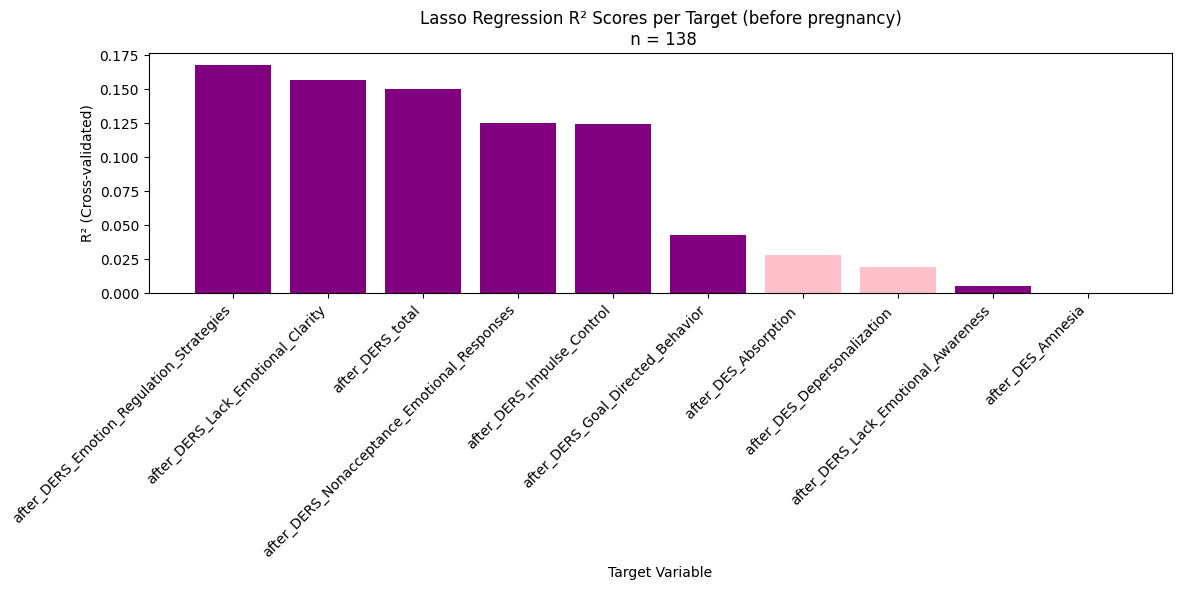

In [6]:


# Load your saved results
df = pd.read_csv("only_Q_outputs/combined/regression_results/lasso_with_cv_b_des.csv")

df_sorted = df.sort_values("R2_cv", ascending=False)
# Define your groups

group1 = ['after_DES_Absorption ', 'after_DES_Amnesia',
'after_DES_Depersonalization ']      # color 1     # color 2
group3 = [ 'after_DERS_Goal_Directed_Behavior', 
'after_DERS_Impulse_Control', 'after_DERS_Lack_Emotional_Awareness', 'after_DERS_Emotion_Regulation_Strategies', 'after_DERS_Lack_Emotional_Clarity', 'after_DERS_total', 'after_DERS_Nonacceptance_Emotional_Responses']      # color 3

# Assign colors based on group membership
colors = []
for t in df_sorted["target"]:
    if t in group1:
        colors.append("pink")      # choose any color
    elif t in group2:
        colors.append("yellow")
    elif t in group3:
        colors.append("purple")
    else:
        colors.append("gray")      # default if not in any group

# Compute the number to show in the title
max_n = df_sorted["n_subjects"].max()
all_same_n = df_sorted["n_subjects"].nunique() == 1

if all_same_n:
    n_for_title = df_sorted["n_subjects"].iloc[0]
else:
    n_for_title = max_n

plt.figure(figsize=(12, 6))
plt.bar(df_sorted["target"], df_sorted["R2_cv"], color=colors)

plt.xlabel("Target Variable")
plt.ylabel("R² (Cross-validated)")
plt.title(f"Lasso Regression R² Scores per Target (before pregnancy)\n n = {n_for_title}")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()





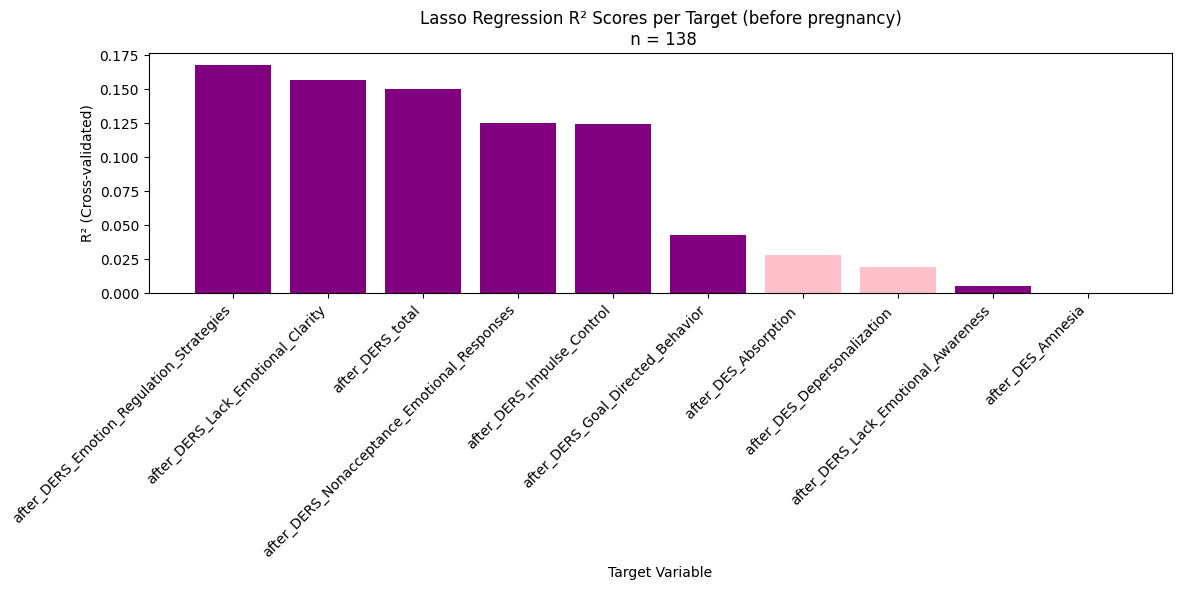

In [7]:


# Load your saved results
df = pd.read_csv("only_Q_outputs/combined/regression_results/lasso_with_cv_b_des.csv")

df_sorted = df.sort_values("R2_cv", ascending=False)
# Define your groups

group1 = ['after_DES_Absorption ', 'after_DES_Amnesia',
'after_DES_Depersonalization ']      # color 1     # color 2
group3 = [ 'after_DERS_Goal_Directed_Behavior', 
'after_DERS_Impulse_Control', 'after_DERS_Lack_Emotional_Awareness', 'after_DERS_Emotion_Regulation_Strategies', 'after_DERS_Lack_Emotional_Clarity', 'after_DERS_total', 'after_DERS_Nonacceptance_Emotional_Responses']      # color 3

# Assign colors based on group membership
colors = []
for t in df_sorted["target"]:
    if t in group1:
        colors.append("pink")      # choose any color
    elif t in group2:
        colors.append("yellow")
    elif t in group3:
        colors.append("purple")
    else:
        colors.append("gray")      # default if not in any group

# Compute the number to show in the title
max_n = df_sorted["n_subjects"].max()
all_same_n = df_sorted["n_subjects"].nunique() == 1

if all_same_n:
    n_for_title = df_sorted["n_subjects"].iloc[0]
else:
    n_for_title = max_n

plt.figure(figsize=(12, 6))
plt.bar(df_sorted["target"], df_sorted["R2_cv"], color=colors)

plt.xlabel("Target Variable")
plt.ylabel("R² (Cross-validated)")
plt.title(f"Lasso Regression R² Scores per Target (before pregnancy)\n n = {n_for_title}")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()





## first trimester

In [8]:
df = pd.read_csv("only_Q_outputs/combined/regression/subjects_pc_t1_with_regression.csv")

pc_cols = [f"PC{i}" for i in range(1, 14)]

targets =    ['after_bits_PTSD_total',
    'after_bits_birth_symptoms', 'after_bits_General_symptoms',
    'after_bits_Dissociatie_symptoms', 'after_bits_PTSD_criterion',
    'after_bits_Re_experiencing ', 'after_bits_Avoidance ',
    'after_bits_Negative_Cognitions ', 'after_bits_Hyperarousal',
    'after_MPAS_total', 'after_MPAS_Attachment',
    'after_MPAS_Hostility', 'after_MPAS_Interaction','t1_MAAS_total','t2_MAAS_total','t3_MAAS_total']
prediction_df, results, results_df = run_regression_and_plot(
    df=df,
    pc_cols=pc_cols,
    targets=targets,
    cluster_col="cluster",
    n_cols=4,
    title_prefix="Predicted: ",
    timepoint="t1",                              # <--- NEW
    save_csv_path="only_Q_outputs/combined/regression_results/lasso_with_cv_t1.csv"  # <--- NEW
)


📁 Saved regression summary to: only_Q_outputs/combined/regression_results/lasso_with_cv_t1.csv


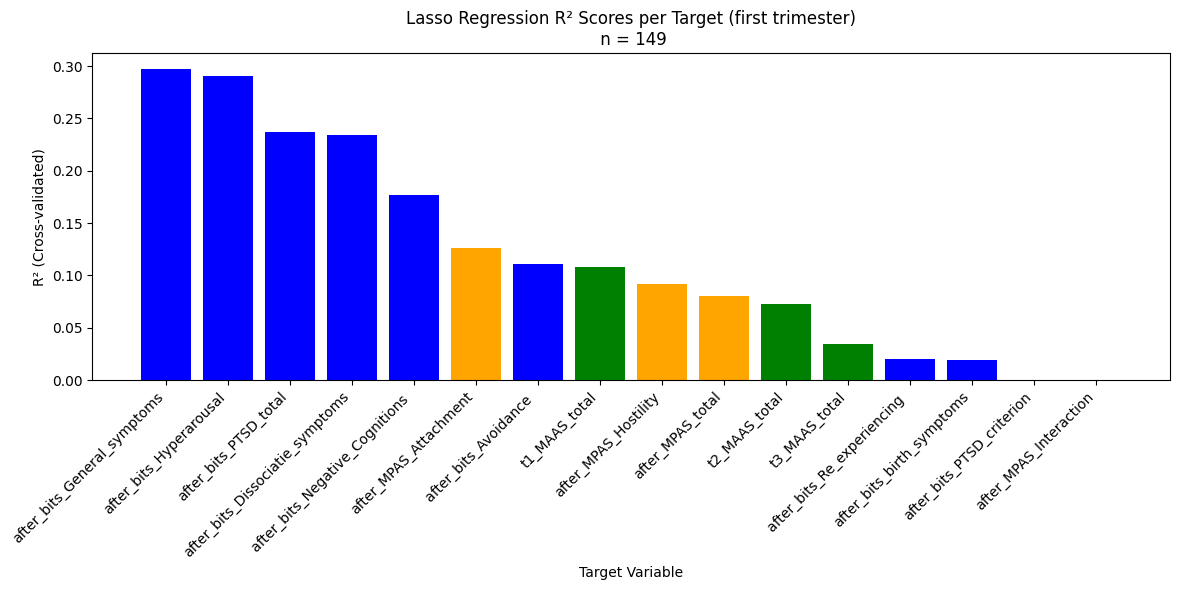

In [9]:

# Load your saved results
df = pd.read_csv("only_Q_outputs/combined/regression_results/lasso_with_cv_t1.csv")

df_sorted = df.sort_values("R2_cv", ascending=False)


group1 = ['after_bits_PTSD_total',
    'after_bits_birth_symptoms', 'after_bits_General_symptoms',
    'after_bits_Dissociatie_symptoms', 'after_bits_PTSD_criterion',
    'after_bits_Re_experiencing ', 'after_bits_Avoidance ',
    'after_bits_Negative_Cognitions ', 'after_bits_Hyperarousal']      # color 1
group2 =   [ 'after_MPAS_total', 'after_MPAS_Attachment',
    'after_MPAS_Hostility', 'after_MPAS_Interaction']                 # color 2
group3 = ['t1_MAAS_total','t2_MAAS_total','t3_MAAS_total']      # color 3

# Assign colors based on group membership
colors = []
for t in df_sorted["target"]:
    if t in group1:
        colors.append("blue")      # choose any color
    elif t in group2:
        colors.append("orange")
    elif t in group3:
        colors.append("green")
    else:
        colors.append("gray")      # default if not in any group

# Compute the number to show in the title
max_n = df_sorted["n_subjects"].max()
all_same_n = df_sorted["n_subjects"].nunique() == 1

if all_same_n:
    n_for_title = df_sorted["n_subjects"].iloc[0]
else:
    n_for_title = max_n

plt.figure(figsize=(12, 6))
plt.bar(df_sorted["target"], df_sorted["R2_cv"], color=colors)

plt.xlabel("Target Variable")
plt.ylabel("R² (Cross-validated)")
plt.title(f"Lasso Regression R² Scores per Target (first trimester)\n n = {n_for_title}")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


## second trimester

In [10]:
df = pd.read_csv("only_Q_outputs/combined/regression/subjects_pc_t2_with_regression.csv")

pc_cols = [f"PC{i}" for i in range(1, 14)]

targets =    ['after_bits_PTSD_total',
    'after_bits_birth_symptoms', 'after_bits_General_symptoms',
    'after_bits_Dissociatie_symptoms', 'after_bits_PTSD_criterion',
    'after_bits_Re_experiencing ', 'after_bits_Avoidance ',
    'after_bits_Negative_Cognitions ', 'after_bits_Hyperarousal',
    'after_MPAS_total', 'after_MPAS_Attachment',
    'after_MPAS_Hostility', 'after_MPAS_Interaction','t2_MAAS_total','t3_MAAS_total']
prediction_df, results, results_df = run_regression_and_plot(
    df=df,
    pc_cols=pc_cols,
    targets=targets,
    cluster_col="cluster",
    n_cols=4,
    title_prefix="Predicted: ",
    timepoint="t2",                              # <--- NEW
    save_csv_path="only_Q_outputs/combined/regression_results/lasso_with_cv_t2.csv"  # <--- NEW
)


📁 Saved regression summary to: only_Q_outputs/combined/regression_results/lasso_with_cv_t2.csv


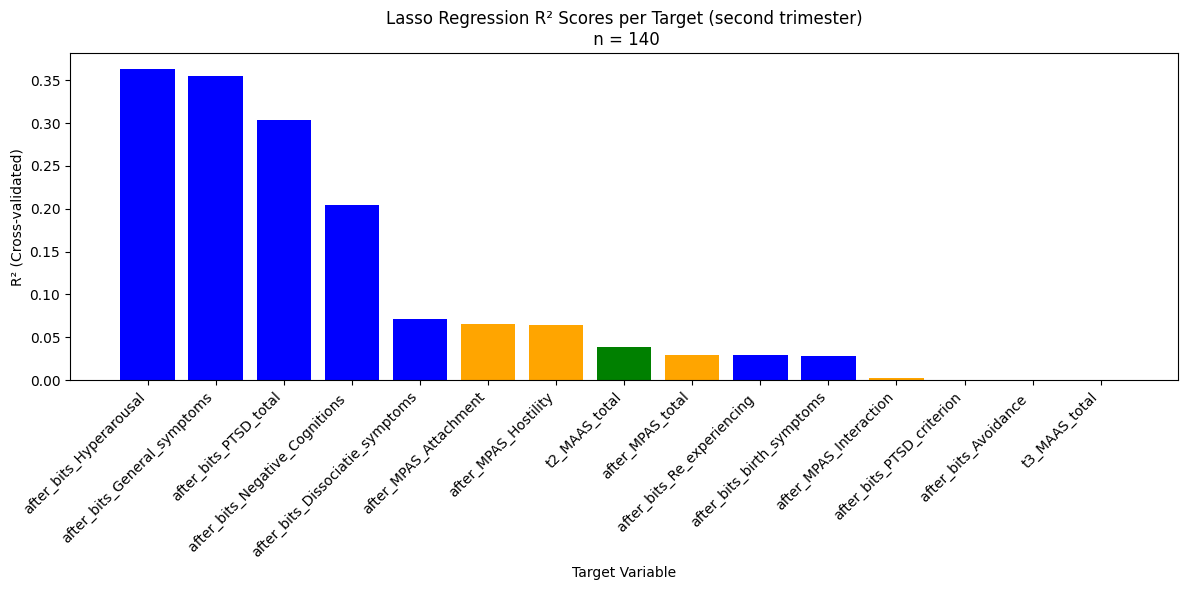

In [11]:

# Load your saved results
df = pd.read_csv("only_Q_outputs/combined/regression_results/lasso_with_cv_t2.csv")

df_sorted = df.sort_values("R2_cv", ascending=False)

group1 = ['after_bits_PTSD_total',
    'after_bits_birth_symptoms', 'after_bits_General_symptoms',
    'after_bits_Dissociatie_symptoms', 'after_bits_PTSD_criterion',
    'after_bits_Re_experiencing ', 'after_bits_Avoidance ',
    'after_bits_Negative_Cognitions ', 'after_bits_Hyperarousal']      # color 1
group2 =   [ 'after_MPAS_total', 'after_MPAS_Attachment',
    'after_MPAS_Hostility', 'after_MPAS_Interaction']                 # color 2
group3 = ['t2_MAAS_total','t3_MAAS_total']      # color 3

# Assign colors based on group membership
colors = []
for t in df_sorted["target"]:
    if t in group1:
        colors.append("blue")      # choose any color
    elif t in group2:
        colors.append("orange")
    elif t in group3:
        colors.append("green")
    else:
        colors.append("gray")      # default if not in any group

# Compute the number to show in the title
max_n = df_sorted["n_subjects"].max()
all_same_n = df_sorted["n_subjects"].nunique() == 1

if all_same_n:
    n_for_title = df_sorted["n_subjects"].iloc[0]
else:
    n_for_title = max_n

plt.figure(figsize=(12, 6))
plt.bar(df_sorted["target"], df_sorted["R2_cv"], color=colors)

plt.xlabel("Target Variable")
plt.ylabel("R² (Cross-validated)")
plt.title(f"Lasso Regression R² Scores per Target (second trimester)\n n = {n_for_title}")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


## third trimester

In [12]:
df = pd.read_csv("only_Q_outputs/combined/regression/subjects_pc_t3_with_regression.csv")

pc_cols = [f"PC{i}" for i in range(1, 14)]

targets =    ['after_bits_PTSD_total',
    'after_bits_birth_symptoms', 'after_bits_General_symptoms',
    'after_bits_Dissociatie_symptoms', 'after_bits_PTSD_criterion',
    'after_bits_Re_experiencing ', 'after_bits_Avoidance ',
    'after_bits_Negative_Cognitions ', 'after_bits_Hyperarousal',
    'after_MPAS_total', 'after_MPAS_Attachment',
    'after_MPAS_Hostility', 'after_MPAS_Interaction','t3_MAAS_total']
prediction_df, results, results_df = run_regression_and_plot(
    df=df,
    pc_cols=pc_cols,
    targets=targets,
    cluster_col="cluster",
    n_cols=4,
    title_prefix="Predicted: ",
    timepoint="t3",                              # <--- NEW
    save_csv_path="only_Q_outputs/combined/regression_results/lasso_with_cv_t3.csv"  # <--- NEW
)


📁 Saved regression summary to: only_Q_outputs/combined/regression_results/lasso_with_cv_t3.csv


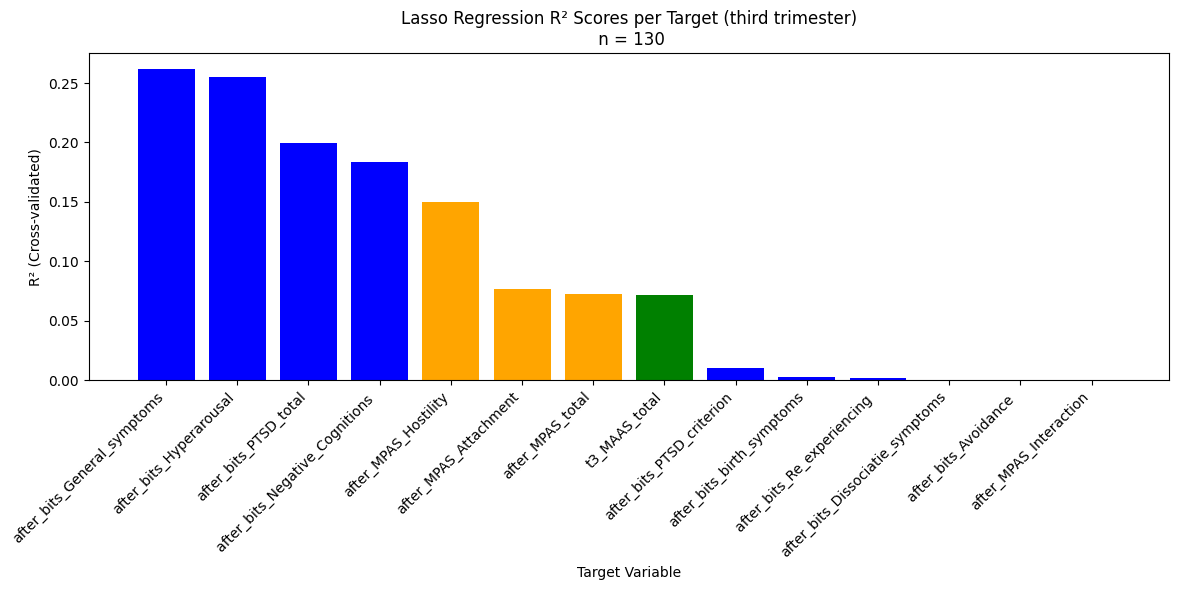

In [13]:

# Load your saved results
df = pd.read_csv("only_Q_outputs/combined/regression_results/lasso_with_cv_t3.csv")

df_sorted = df.sort_values("R2_cv", ascending=False)

group1 = ['after_bits_PTSD_total',
    'after_bits_birth_symptoms', 'after_bits_General_symptoms',
    'after_bits_Dissociatie_symptoms', 'after_bits_PTSD_criterion',
    'after_bits_Re_experiencing ', 'after_bits_Avoidance ',
    'after_bits_Negative_Cognitions ', 'after_bits_Hyperarousal']      # color 1
group2 =   [ 'after_MPAS_total', 'after_MPAS_Attachment',
    'after_MPAS_Hostility', 'after_MPAS_Interaction']                 # color 2
group3 = ['t3_MAAS_total']      # color 3

# Assign colors based on group membership
colors = []
for t in df_sorted["target"]:
    if t in group1:
        colors.append("blue")      # choose any color
    elif t in group2:
        colors.append("orange")
    elif t in group3:
        colors.append("green")
    else:
        colors.append("gray")      # default if not in any group

# Compute the number to show in the title
max_n = df_sorted["n_subjects"].max()
all_same_n = df_sorted["n_subjects"].nunique() == 1

if all_same_n:
    n_for_title = df_sorted["n_subjects"].iloc[0]
else:
    n_for_title = max_n

plt.figure(figsize=(12, 6))
plt.bar(df_sorted["target"], df_sorted["R2_cv"], color=colors)

plt.xlabel("Target Variable")
plt.ylabel("R² (Cross-validated)")
plt.title(f"Lasso Regression R² Scores per Target (third trimester)\n n = {n_for_title}")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

## after pregnancy

In [14]:
df = pd.read_csv("only_Q_outputs/combined/regression/subjects_pc_after_with_regression.csv")

pc_cols = [f"PC{i}" for i in range(1, 14)]

targets =    ['after_bits_PTSD_total',
    'after_bits_birth_symptoms', 'after_bits_General_symptoms',
    'after_bits_Dissociatie_symptoms', 'after_bits_PTSD_criterion',
    'after_bits_Re_experiencing ', 'after_bits_Avoidance ',
    'after_bits_Negative_Cognitions ', 'after_bits_Hyperarousal',
    'after_MPAS_total', 'after_MPAS_Attachment',
    'after_MPAS_Hostility', 'after_MPAS_Interaction']
prediction_df, results, results_df = run_regression_and_plot(
    df=df,
    pc_cols=pc_cols,
    targets=targets,
    cluster_col="cluster",
    n_cols=4,
    title_prefix="Predicted: ",
    timepoint="t3",                             # <--- NEW
    save_csv_path="only_Q_outputs/combined/regression_results/lasso_with_cv_after.csv"  # <--- NEW
)


📁 Saved regression summary to: only_Q_outputs/combined/regression_results/lasso_with_cv_after.csv


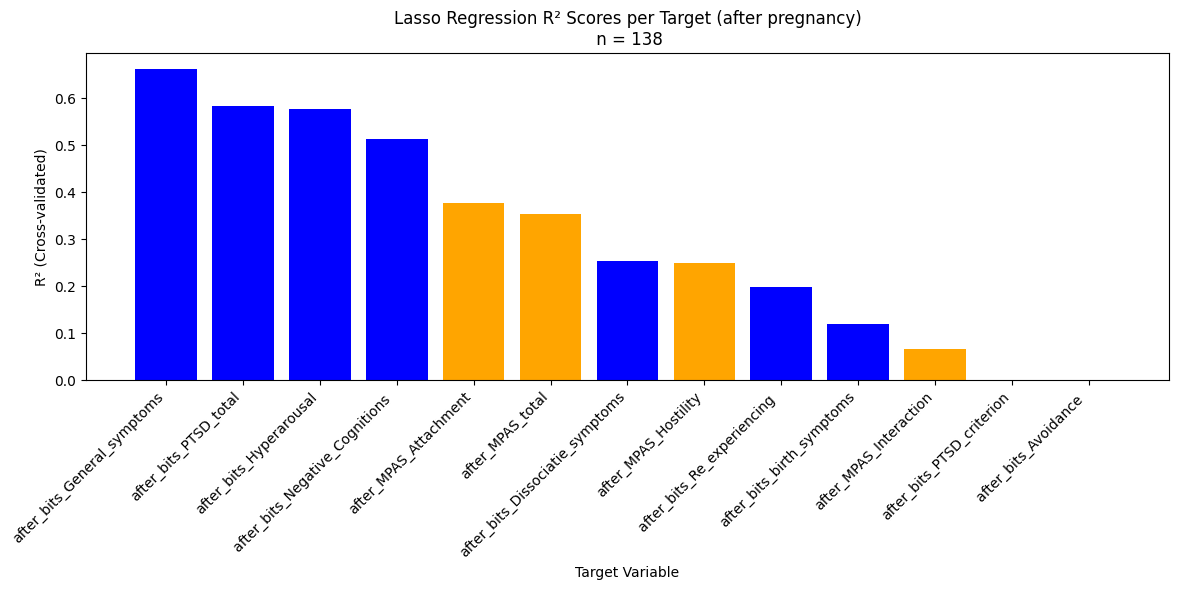

In [15]:

# Load your saved results
df = pd.read_csv("only_Q_outputs/combined/regression_results/lasso_with_cv_after.csv")

df_sorted = df.sort_values("R2_cv", ascending=False)

group1 = ['after_bits_PTSD_total',
    'after_bits_birth_symptoms', 'after_bits_General_symptoms',
    'after_bits_Dissociatie_symptoms', 'after_bits_PTSD_criterion',
    'after_bits_Re_experiencing ', 'after_bits_Avoidance ',
    'after_bits_Negative_Cognitions ', 'after_bits_Hyperarousal']      # color 1
group2 =   [ 'after_MPAS_total', 'after_MPAS_Attachment',
    'after_MPAS_Hostility', 'after_MPAS_Interaction']                 # color 2
     # color 3

# Assign colors based on group membership
colors = []
for t in df_sorted["target"]:
    if t in group1:
        colors.append("blue")      # choose any color
    elif t in group2:
        colors.append("orange")
    elif t in group3:
        colors.append("green")
    else:
        colors.append("gray")      # default if not in any group

# Compute the number to show in the title
max_n = df_sorted["n_subjects"].max()
all_same_n = df_sorted["n_subjects"].nunique() == 1

if all_same_n:
    n_for_title = df_sorted["n_subjects"].iloc[0]
else:
    n_for_title = max_n

plt.figure(figsize=(12, 6))
plt.bar(df_sorted["target"], df_sorted["R2_cv"], color=colors)

plt.xlabel("Target Variable")
plt.ylabel("R² (Cross-validated)")
plt.title(f"Lasso Regression R² Scores per Target (after pregnancy)\n n = {n_for_title}")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


# predicting using the trajectory

In [16]:
df = pd.read_csv(r"only_Q_outputs\combined\regression\subjects_ALL_PC_TRAJRCTORY_with_regression.csv")
timepoints = ["b", "t1", "t2","t3","after"]
pc_cols = [c for c in df.columns if c.startswith("PC")]

targets =    ['after_bits_PTSD_total',
    'after_bits_birth_symptoms', 'after_bits_General_symptoms',
    'after_bits_Dissociatie_symptoms', 'after_bits_PTSD_criterion',
    'after_bits_Re_experiencing ', 'after_bits_Avoidance ',
    'after_bits_Negative_Cognitions ', 'after_bits_Hyperarousal',
    'after_MPAS_total', 'after_MPAS_Attachment',
    'after_MPAS_Hostility', 'after_MPAS_Interaction','t1_MAAS_total','t2_MAAS_total','t3_MAAS_total']


_, _, results_df = run_lasso_cv_scatter(
    df,
    pc_cols,
    targets,
    plot=False,
    save_summary_path="only_Q_outputs/combined/regression_results/trajectory"
)


c:\Users\nogag\PycharmProjects\technion\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nogag\PycharmProjects\technion\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nogag\PycharmProjects\technion\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the feature

Saved summary (target, R2_cv) to: only_Q_outputs/combined/regression_results/trajectory.csv


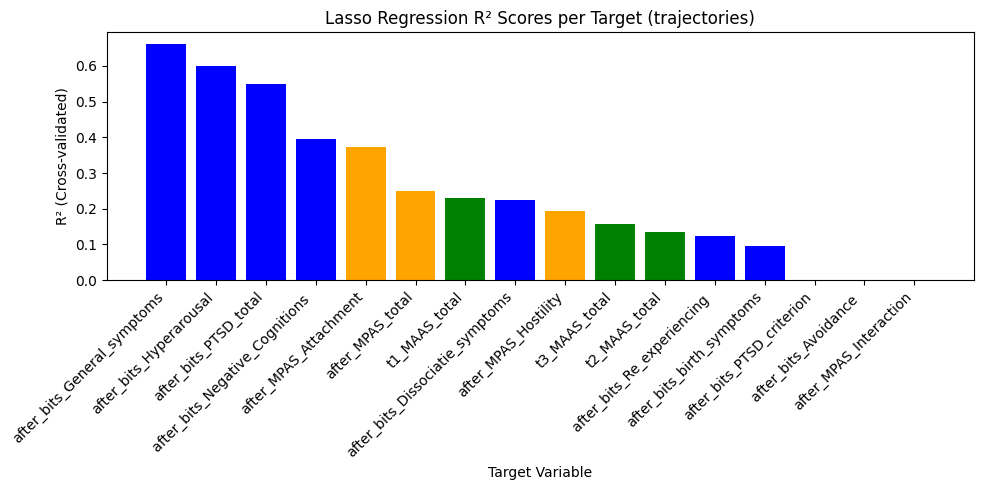

In [17]:

# Load your saved results
df = pd.read_csv("only_Q_outputs/combined/regression_results/trajectory.csv")

df_sorted = df.sort_values("R2_cv", ascending=False)

group1 = ['after_bits_PTSD_total',
    'after_bits_birth_symptoms', 'after_bits_General_symptoms',
    'after_bits_Dissociatie_symptoms', 'after_bits_PTSD_criterion',
    'after_bits_Re_experiencing ', 'after_bits_Avoidance ',
    'after_bits_Negative_Cognitions ', 'after_bits_Hyperarousal']      # color 1
group2 =   [ 'after_MPAS_total', 'after_MPAS_Attachment',
    'after_MPAS_Hostility', 'after_MPAS_Interaction']                 # color 2
group3 = ['t1_MAAS_total','t2_MAAS_total','t3_MAAS_total']      # color 3

# Assign colors based on group membership
colors = []
for t in df_sorted["target"]:
    if t in group1:
        colors.append("blue")      # choose any color
    elif t in group2:
        colors.append("orange")
    elif t in group3:
        colors.append("green")
    else:
        colors.append("gray")      # default if not in any group

# Plot
plt.figure(figsize=(10, 5))
plt.bar(df_sorted["target"], df_sorted["R2_cv"], color=colors)
plt.xlabel("Target Variable")
plt.ylabel("R² (Cross-validated)")
plt.title("Lasso Regression R² Scores per Target (trajectories)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [18]:
df = pd.read_csv(r"only_Q_outputs\combined\regression\subjects_ALL_PC_TRAJRCTORY_with_regression.csv")

timepoints = ["b", "t1", "t2","t3"]
pc_cols = [c for c in df.columns if c.startswith("PC")]

targets =    ['after_bits_PTSD_total',
    'after_bits_birth_symptoms', 'after_bits_General_symptoms',
    'after_bits_Dissociatie_symptoms', 'after_bits_PTSD_criterion',
    'after_bits_Re_experiencing ', 'after_bits_Avoidance ',
    'after_bits_Negative_Cognitions ', 'after_bits_Hyperarousal',
    'after_MPAS_total', 'after_MPAS_Attachment',
    'after_MPAS_Hostility', 'after_MPAS_Interaction','t1_MAAS_total','t2_MAAS_total','t3_MAAS_total']


_, _, results_df = run_lasso_cv_scatter(
    df,
    pc_cols,
    targets,
    plot=False,
    save_summary_path="only_Q_outputs/combined/regression_results/trajectory_no_after"
)


c:\Users\nogag\PycharmProjects\technion\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nogag\PycharmProjects\technion\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nogag\PycharmProjects\technion\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the feature

Saved summary (target, R2_cv) to: only_Q_outputs/combined/regression_results/trajectory_no_after.csv


In [19]:
df = pd.read_csv(r"only_Q_outputs/combined/regression/subjects_ALL_PC_DIFFERENCE_with_regression_des.csv")
timepoints = ["b", "t1", "t2","t3","after"]

pc_cols = [c for c in df.columns if c.startswith("PC")]

targets = [ 'after_DES_Absorption ', 'after_DES_Amnesia',
'after_DES_Depersonalization ','after_DERS_total', 
'after_DERS_Nonacceptance_Emotional_Responses', 'after_DERS_Goal_Directed_Behavior', 
'after_DERS_Impulse_Control', 'after_DERS_Lack_Emotional_Awareness', 'after_DERS_Emotion_Regulation_Strategies', 'after_DERS_Lack_Emotional_Clarity']


_, _, results_df = run_lasso_cv_scatter(
    df,
    pc_cols,
    targets,
    plot=False,
    save_summary_path="only_Q_outputs/combined/regression_results/trajectory_des_ders"
)


Saved summary (target, R2_cv) to: only_Q_outputs/combined/regression_results/trajectory_des_ders.csv


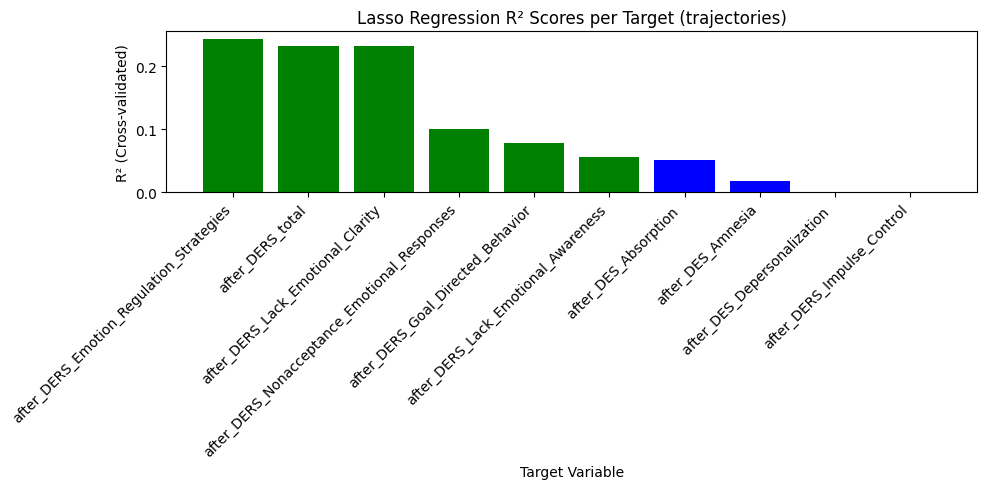

In [20]:

# Load your saved results
df = pd.read_csv("only_Q_outputs/combined/regression_results/trajectory_des_ders.csv")

df_sorted = df.sort_values("R2_cv", ascending=False)


group1 = ['after_DES_Absorption ', 'after_DES_Amnesia',
'after_DES_Depersonalization ','after_bits_Negative_Cognitions ', 'after_bits_Hyperarousal']      # color 1
group3 = [ 'after_DERS_total', 
'after_DERS_Nonacceptance_Emotional_Responses', 'after_DERS_Goal_Directed_Behavior', 
'after_DERS_Impulse_Control', 'after_DERS_Lack_Emotional_Awareness', 'after_DERS_Emotion_Regulation_Strategies', 'after_DERS_Lack_Emotional_Clarity']      # color 3

# Assign colors based on group membership
colors = []
for t in df_sorted["target"]:
    if t in group1:
        colors.append("blue")      # choose any color
    elif t in group2:
        colors.append("orange")
    elif t in group3:
        colors.append("green")
    else:
        colors.append("gray")      # default if not in any group

# Plot
plt.figure(figsize=(10, 5))
plt.bar(df_sorted["target"], df_sorted["R2_cv"], color=colors)
plt.xlabel("Target Variable")
plt.ylabel("R² (Cross-validated)")
plt.title("Lasso Regression R² Scores per Target (trajectories)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


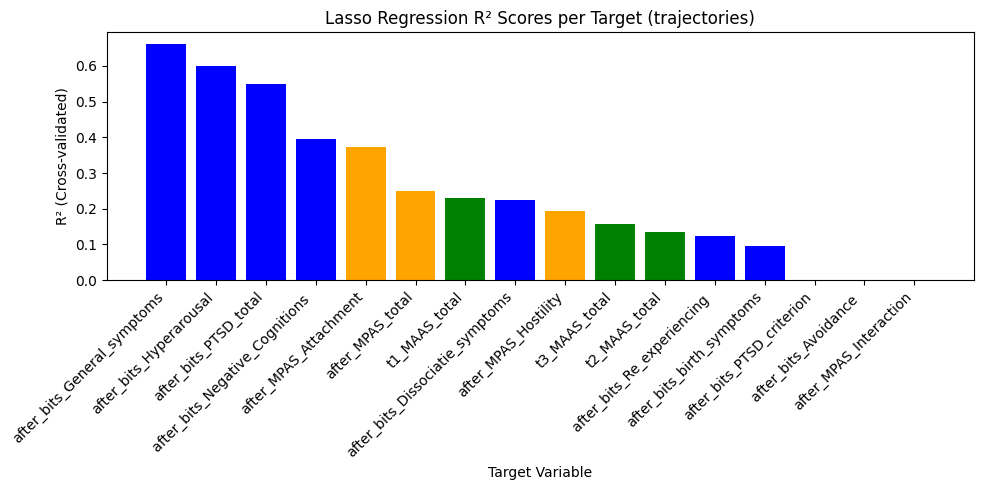

In [21]:

# Load your saved results
df = pd.read_csv("only_Q_outputs/combined/regression_results/trajectory_no_after.csv")

df_sorted = df.sort_values("R2_cv", ascending=False)

group1 = ['after_bits_PTSD_total',
    'after_bits_birth_symptoms', 'after_bits_General_symptoms',
    'after_bits_Dissociatie_symptoms', 'after_bits_PTSD_criterion',
    'after_bits_Re_experiencing ', 'after_bits_Avoidance ',
    'after_bits_Negative_Cognitions ', 'after_bits_Hyperarousal']      # color 1
group2 =   [ 'after_MPAS_total', 'after_MPAS_Attachment',
    'after_MPAS_Hostility', 'after_MPAS_Interaction']                 # color 2
group3 = ['t1_MAAS_total','t2_MAAS_total','t3_MAAS_total']      # color 3

# Assign colors based on group membership
colors = []
for t in df_sorted["target"]:
    if t in group1:
        colors.append("blue")      # choose any color
    elif t in group2:
        colors.append("orange")
    elif t in group3:
        colors.append("green")
    else:
        colors.append("gray")      # default if not in any group

# Plot
plt.figure(figsize=(10, 5))
plt.bar(df_sorted["target"], df_sorted["R2_cv"], color=colors)
plt.xlabel("Target Variable")
plt.ylabel("R² (Cross-validated)")
plt.title("Lasso Regression R² Scores per Target (trajectories)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [22]:
import pandas as pd

# Load each timepoint result
df_b   = pd.read_csv("only_Q_outputs/combined/regression_results/lasso_with_cv_b.csv").assign(timepoint="b")
df_t1  = pd.read_csv("only_Q_outputs/combined/regression_results/lasso_with_cv_t1.csv").assign(timepoint="t1")
df_t2  = pd.read_csv("only_Q_outputs/combined/regression_results/lasso_with_cv_t2.csv").assign(timepoint="t2")
df_t3  = pd.read_csv("only_Q_outputs/combined/regression_results/lasso_with_cv_t3.csv").assign(timepoint="t3")
df_after = pd.read_csv("only_Q_outputs/combined/regression_results/trajectory.csv").assign(timepoint="after")
df_traj  = pd.read_csv("only_Q_outputs/combined/regression_results/lasso_with_cv_after.csv").assign(timepoint="trajectory")

# Combine all into one long dataframe
df_all = pd.concat([df_b, df_t1, df_t2, df_t3, df_after, df_traj], ignore_index=True)
df_all.head()


,timepoint,target,alpha,intercept,coeff_PC1_PC13,R2_cv,n_subjects
0,b,after_bits_PTSD_total,0.701867,12.088796,"[1.9662986017945536, -0.0, 0.0, 0.0, 0.0, -0.0...",0.334941,135.0
1,b,after_bits_birth_symptoms,0.315809,3.410082,"[0.28867706192245807, 0.0, -0.0, -0.0, 0.0, -0...",0.159647,136.0
2,b,after_bits_General_symptoms,0.681858,9.440530,"[1.8606073464705577, -0.0, 0.33062475246463247...",0.311035,135.0
3,b,after_bits_Dissociatie_symptoms,0.221338,0.628048,"[0.1050784662664968, -0.0, 0.0, -0.0, 0.0, -0....",0.071849,136.0
4,b,after_bits_PTSD_criterion,0.046582,0.022059,"[0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0...",0.000000,136.0


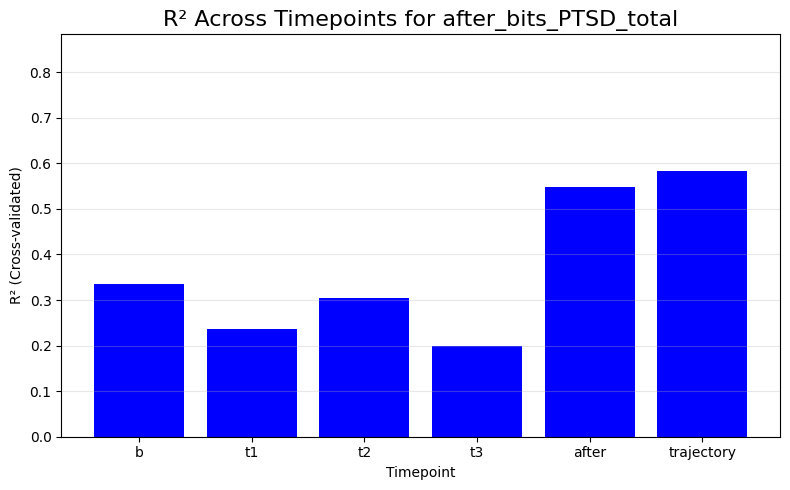

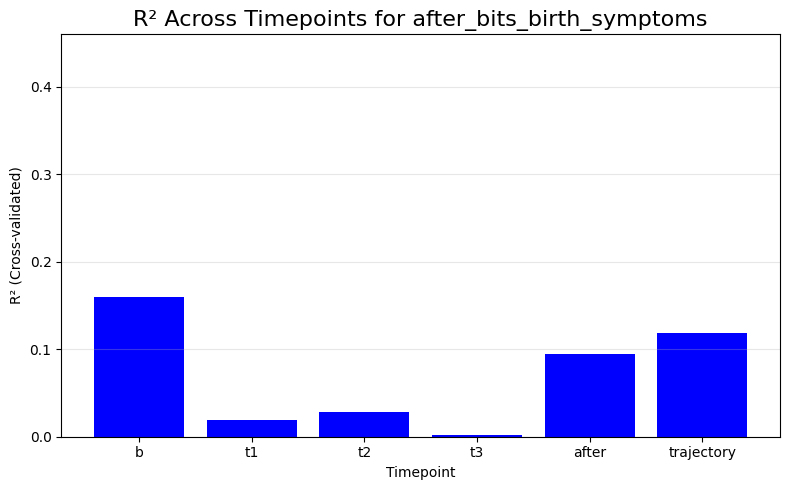

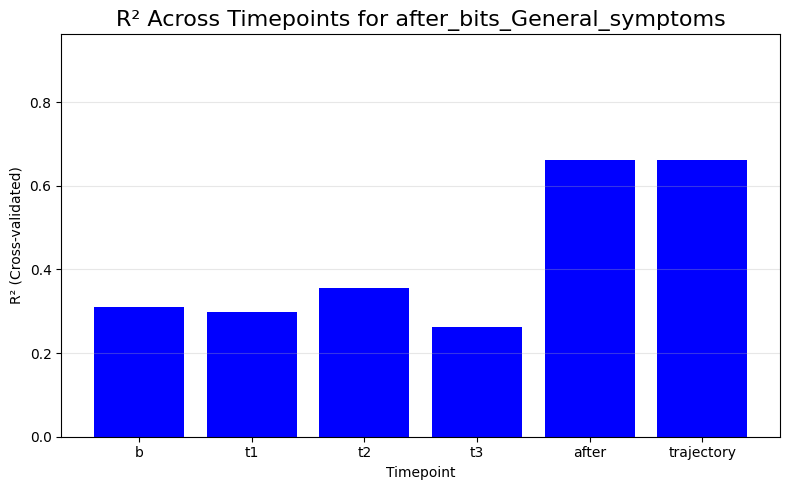

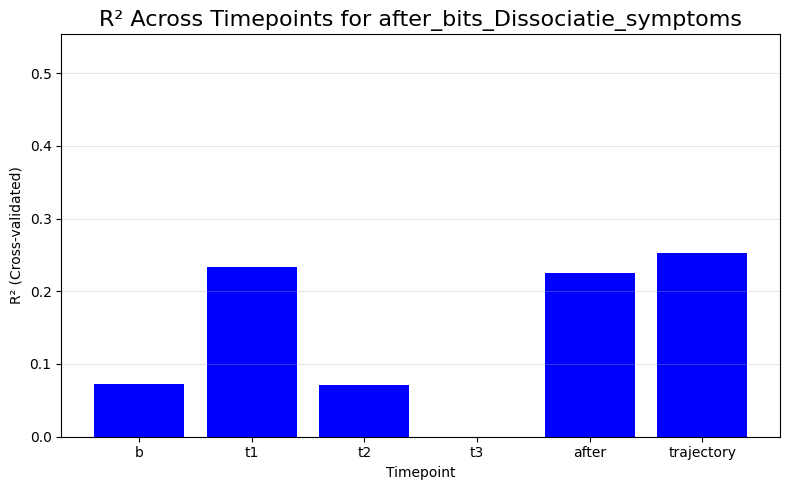

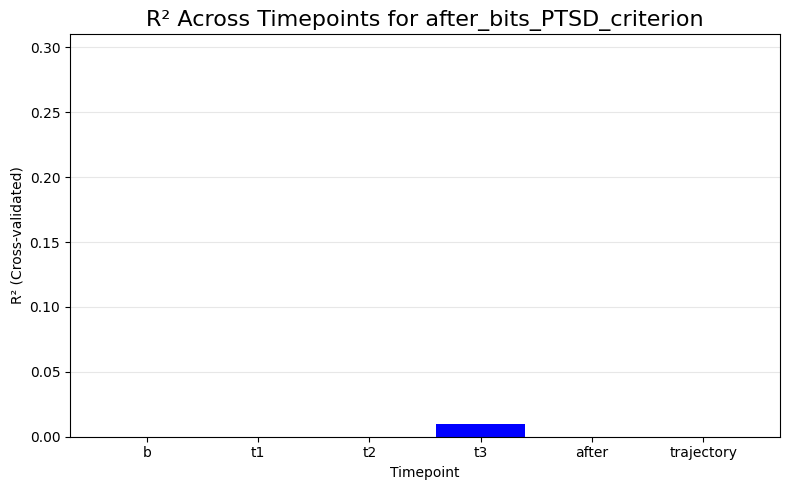

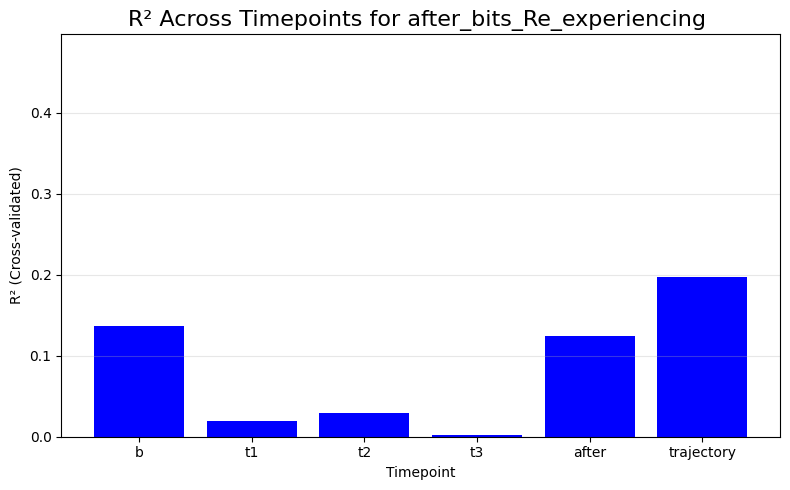

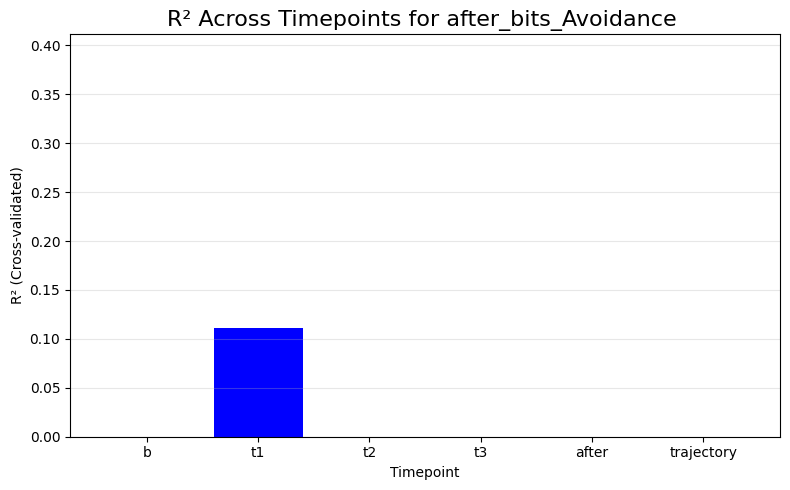

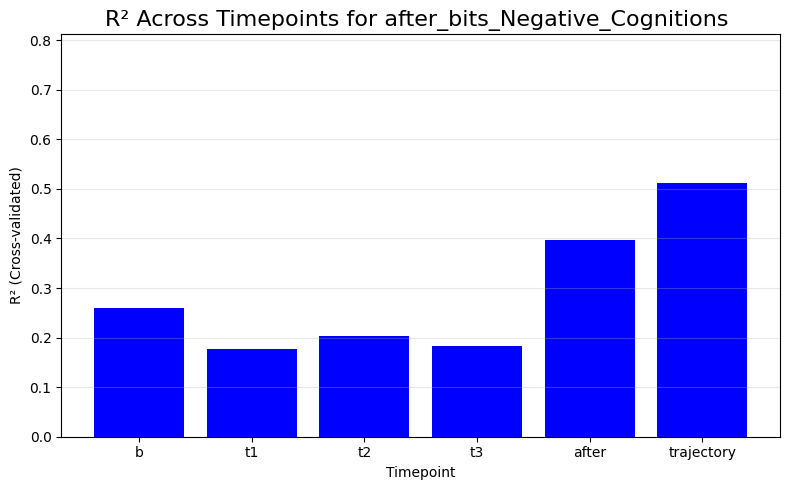

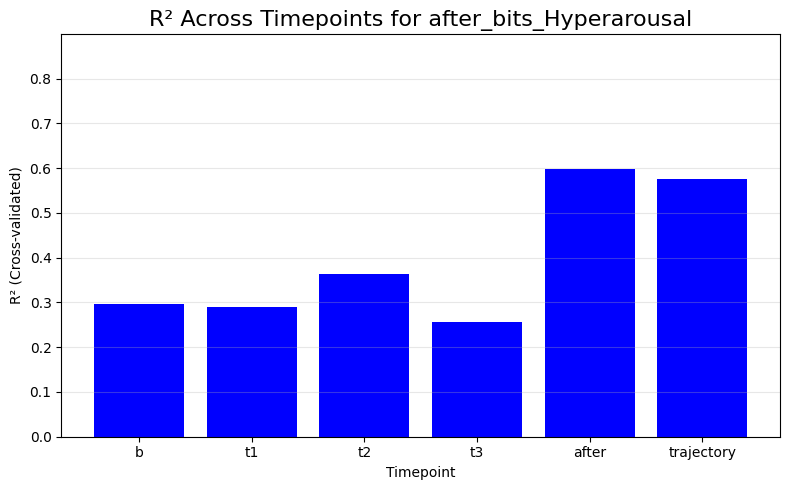

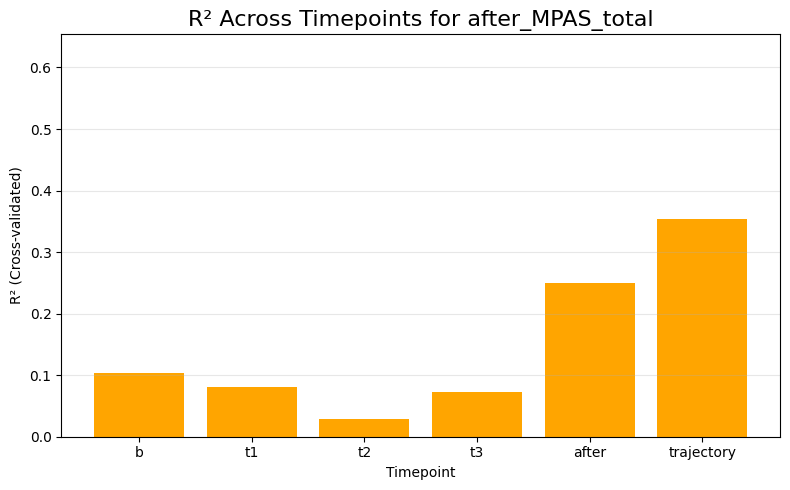

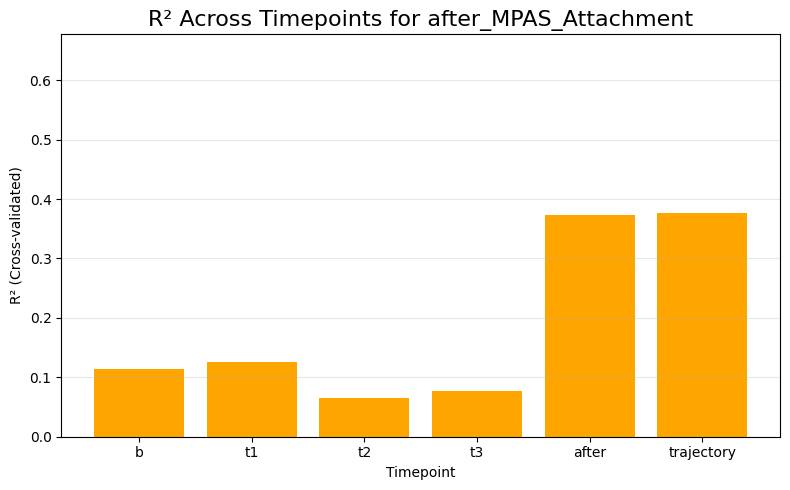

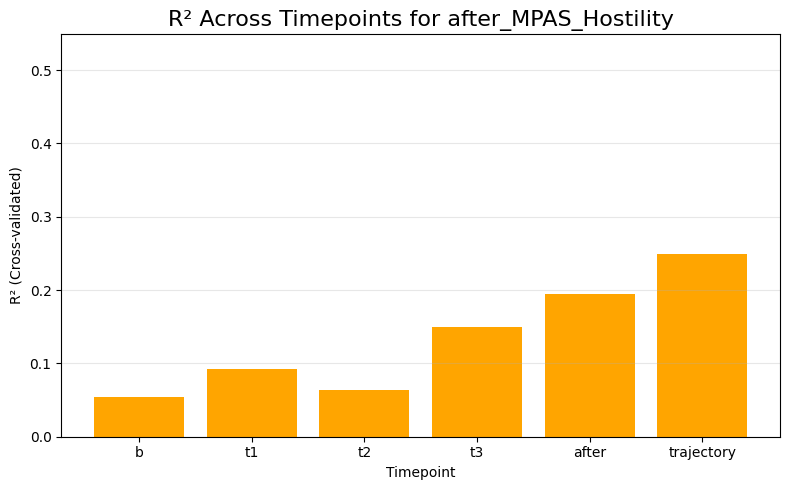

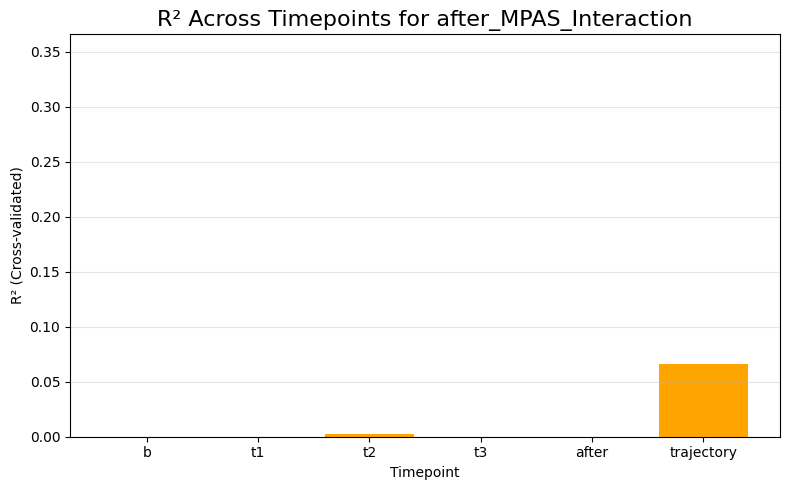

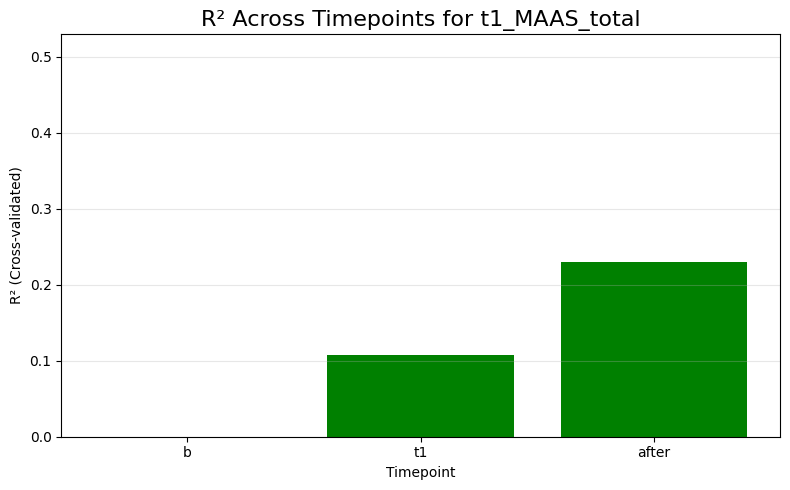

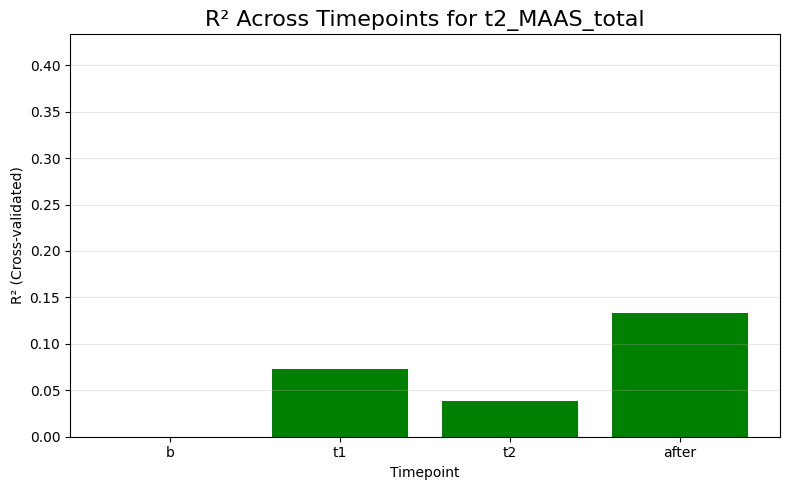

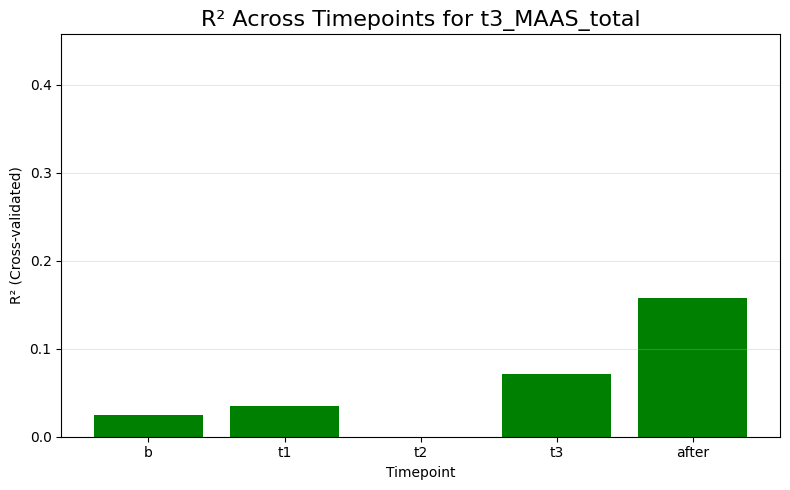

In [23]:
import matplotlib.pyplot as plt

# --- Define your 3 groups of parameters ---
group1 = ['after_bits_PTSD_total',
    'after_bits_birth_symptoms', 'after_bits_General_symptoms',
    'after_bits_Dissociatie_symptoms', 'after_bits_PTSD_criterion',
    'after_bits_Re_experiencing ', 'after_bits_Avoidance ',
    'after_bits_Negative_Cognitions ', 'after_bits_Hyperarousal']      # color 1
group2 =   [ 'after_MPAS_total', 'after_MPAS_Attachment',
    'after_MPAS_Hostility', 'after_MPAS_Interaction']                 # color 2
group3 = ['t1_MAAS_total','t2_MAAS_total','t3_MAAS_total']      # color 3

# Map each group to a color
color_map = {
    "group1": "blue",
    "group2": "orange",
    "group3": "green"
}

def get_color(target):
    if target in group1:
        return color_map["group1"]
    elif target in group2:
        return color_map["group2"]
    elif target in group3:
        return color_map["group3"]
    else:
        return "gray"   # fallback color

# Ensure ordering of timepoints in the plot
time_order = ["b", "t1", "t2", "t3", "after", "trajectory"]

for target in df_all["target"].unique():

    # Subset the data
    sub = df_all[df_all["target"] == target].copy()
    # Safe reindex: keep only existing timepoints
    sub = sub.set_index("timepoint").reindex(time_order).dropna(subset=["R2_cv"]).reset_index()

    # Pick the right color for THIS parameter
    bar_color = get_color(target)

    plt.figure(figsize=(8, 5))
    plt.bar(sub["timepoint"], sub["R2_cv"], color=bar_color)

    plt.title(f"R² Across Timepoints for {target}", fontsize=16)
    plt.ylabel("R² (Cross-validated)")
    plt.xlabel("Timepoint")

    plt.ylim(0, max(sub["R2_cv"].max() + 0.3, 0.01))
    plt.grid(axis="y", alpha=0.3)

    plt.tight_layout()
    plt.show()
